<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>



The hour hand moves at the rate of 0.5 degrees per minute
The minute and second hands moves at the rate of of 6 degrees per minute


In [393]:
#create the data to plot the clock dial
df = pd.DataFrame()
hr = []
for x in range(0,24):
    hr.append(x+1)

df['hr']=hr
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))


In [394]:
#Function to calculate the coordinates when a clock hand rotates
import math

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [395]:
import datetime
now = datetime.datetime.now()
# print('Minute', now.minute)
# print('Hour', now.hour)
# print('second', now.second)

In [396]:
#Calculate the angle of the hand from 12 'o clock'
minute_hand = now.minute * 6
#Calculate the angle of the hand on the other side of the centre point
minute_hand_opposite = (now.minute+30) * 6

In [397]:
#convert 24 hour to 12 hour
import time
t = time.strptime(str(now.hour), "%H")
timevalue_12hour = time.strftime( "%I", t )

hour_hand = (int(timevalue_12hour)*60+now.minute)*.5

hour_hand_opposite = ((int(timevalue_12hour)*60+now.minute)+360)*.5

In [398]:
seconds_hand = now.second * 6

seconds_hand_opposite = (now.second+30) * 6

In [399]:
# Define midpoint
origin = (0, 0)

#define length of hand by defining point at 12 'o clock'
pointhour = (.75, 0)
pointminute = (1, 0)
pointsecond = (.80, 0)

pointopposite = (.2,0)
pointoppositesec = (.3,0)


In [400]:
# Calculate points for hands
xm, ym = rotate(origin, pointminute, math.radians(minute_hand))

xmo, ymo = rotate(origin, pointopposite, math.radians(minute_hand_opposite))

xh, yh = rotate(origin, pointhour, math.radians(hour_hand))

xho, yho = rotate(origin, pointopposite, math.radians(hour_hand_opposite))

xs, ys = rotate(origin, pointsecond, math.radians(seconds_hand))

xso, yso = rotate(origin, pointoppositesec, math.radians(seconds_hand_opposite))

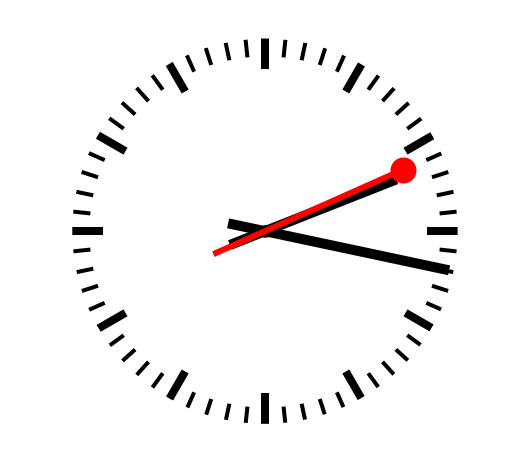

In [401]:
# https://stackoverflow.com/questions/23345565/is-it-possible-to-control-matplotlib-marker-orientation
import matplotlib.pyplot as plt
import matplotlib as mpl
figsize = (4,4)
fig, ax = plt.subplots(figsize=figsize)


ax.add_patch(plt.Circle((0, 0), 1.05, fill=None, ec='white', lw=5, zorder=90))

for i in range(1,24,2):
    angle = (np.array(np.linspace(15,360,24))[i])
    a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.95), (a2*.95), marker=t, s=(figsize[0]/4)*300, c='k')
    
for i in range(1,61):
    angle = (np.array(np.linspace(0,360,61))[i])
    a1, a2  = (np.sin(i*2.*np.pi/60)),np.cos(i*(2.*np.pi/60))
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.98), (a2*.98), marker=t, s=(figsize[0]/4)*80, c='k', lw=2)
    
ax.plot((ym, 0),(xm, 0), lw =(figsize[0]/4)*5, c='black')
ax.plot((ymo, 0),(xmo, 0), lw =(figsize[0]/4)*5, c='black')
# ax.plot((0, 0),(0.8, 0), lw =5, c='black')
ax.plot((yh, 0),(xh,0), lw =(figsize[0]/4)*5, c='black')
ax.plot((yho, 0),(xho,0), lw =(figsize[0]/4)*5, c='black')
ax.scatter(0,0, c= 'red')


ax.plot((ys, 0),(xs,0), lw =(figsize[0]/4)*3, marker='o',c='red', markevery=-1, markersize=(figsize[0]/4)*12)
ax.plot((yso, 0),(xso,0), lw =(figsize[0]/4)*3,c='red')

#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.axis('off')
plt.show()

In [305]:
 mlp.rcParams

/anaconda3/lib/python3.6/site-packages/IPython/lib/pretty.py:697: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  output = repr(obj)


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '#f0f0f0',
          'axes.facecolor': '#f0f0f0',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes

6

In [370]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

n = 1

# Get your xy data points, which are the centers of the rectangles.
x = 1

y = 1
# Set a fixed height
height = 0.1
# The variable widths of the rectangles
width = 0.2



xpos = x - width/2 # The x position will be half the width from the center
ypos = y - height/2 # same for the y position, but with height
rect = Rectangle( (xpos, ypos), width, height ) # Create a rectangle
    

ax = fig.add_subplot(111)
ax.add_patch(rect)
# Add your ScalarMappable to a figure colorbar
# fig.colorbar(mappable)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


RuntimeError: Can not put single artist in more than one figure

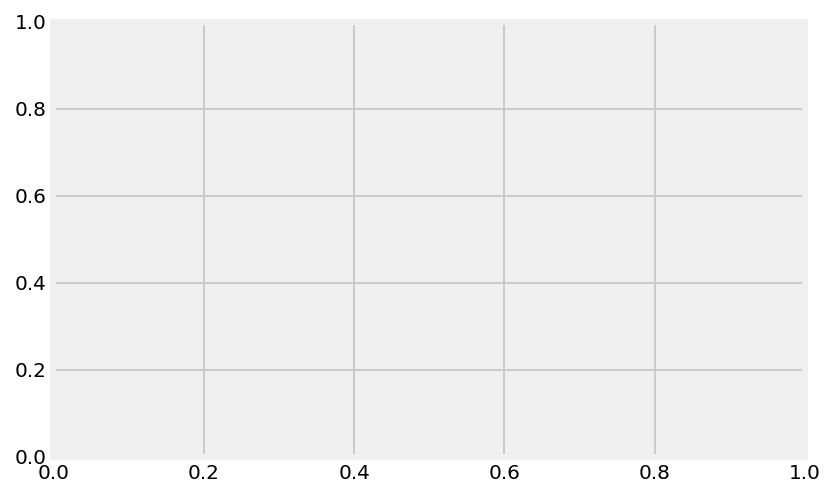

In [369]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_subplot(111)

w = 40
l = 60
# r1 = patches.Rectangle((0-(.5*w),0-(.5*l)), w, l, color="blue", alpha=0.50)
# r2 = patches.Rectangle((0-(.5*w),0-(.5*l)), w, l, color="red",  alpha=0.50)

# t2 = mpl.transforms.Affine2D().rotate_deg(-45) + ax.transData
# r2.set_transform(t2)

# ax.add_patch(r1)
# ax.add_patch(r2)

# for i in range(1,24,2):
i=3
angle = (np.array(np.linspace(15,360,24))[i])
a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])

r1 = patches.Rectangle((0-(.5*w),0-(.5*l)), w, l, color="blue", alpha=0.50)

t2 = mpl.transforms.Affine2D().rotate_deg(-angle)+ ax.transData
r2.set_transform(t2)
ax.add_patch(r2)
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(-angle)
plt.scatter(0-(.5*w),0-(.5*l), c='k')

# plt.xlim(-.5,.5)
# plt.ylim(-.5,.5)
plt.grid(True)
# ax.axis('equal')

plt.show()

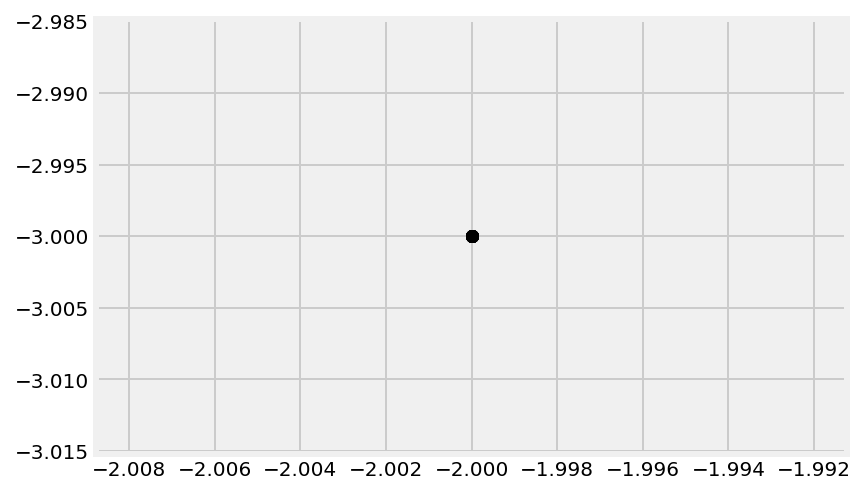

In [410]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_subplot(111)

w = 4
l = 6
# r1 = patches.Rectangle((0-(.5*w),0-(.5*l)), w, l, color="blue", alpha=0.50)
# r2 = patches.Rectangle((0-(.5*w),0-(.5*l)), w, l, color="red",  alpha=0.50)

# t2 = mpl.transforms.Affine2D().rotate_deg(-45) + ax.transData
# r2.set_transform(t2)

# ax.add_patch(r1)
# ax.add_patch(r2)

for i in range(1,24,2):
    angle = (np.array(np.linspace(15,360,24))[i])
    a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
    
    t2 = mpl.transforms.Affine2D().rotate_deg(-angle)+ ax.transData
    r2.set_transform(t2)
#     t = mpl.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter(0-(.5*w),0-(.5*l), c='k')

# plt.xlim(-.5,.5)
# plt.ylim(-.5,.5)
plt.grid(True)
# ax.axis('equal')

plt.show()

In [411]:
i=3
angle = (np.array(np.linspace(15,360,24))[i])
a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
i_=10
angle = (np.array(np.linspace(15,360,24))[i_])
a3, a4  = (df['hr_sin'][i_],df['hr_cos'][i_])

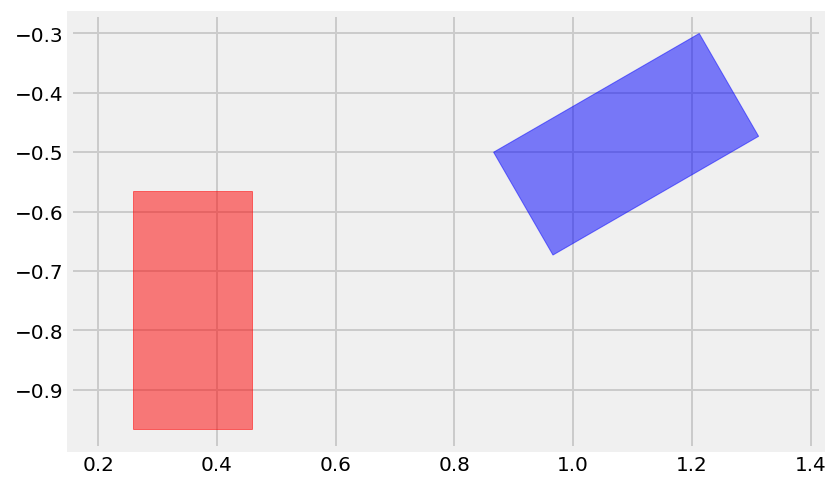

In [414]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_subplot(111)

r3 = patches.Rectangle((a1,a2), .2, .4, color="blue", alpha=0.50)
r2 = patches.Rectangle((a3,a4), .2, .4, color="red",  alpha=0.50)

t2 = mpl.transforms.Affine2D().rotate_deg(-0) + ax.transData
t3 = mpl.transforms.Affine2D().rotate_deg(-60) + ax.transData
r2.set_transform(t2)
r3.set_transform(t3)

ax.add_patch(r3)
ax.add_patch(r2)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.grid(True)
ax.axis('equal')
plt.show()

In [373]:
a1

0.8660254037844386

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


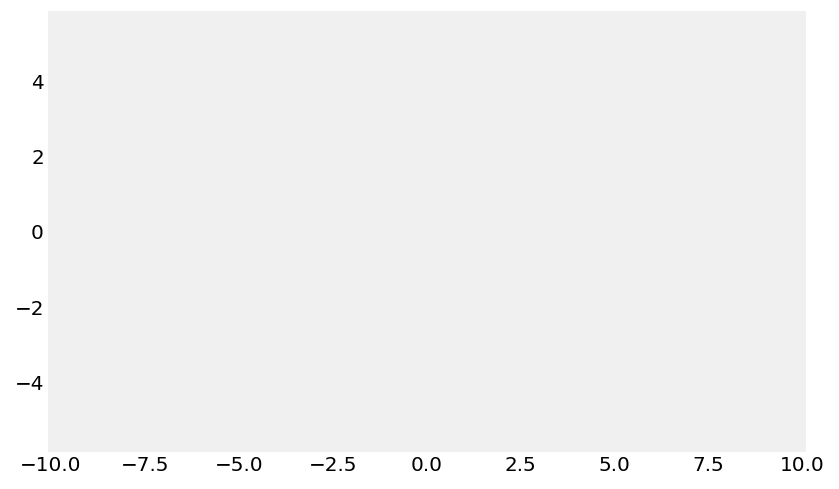

In [402]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation

x = [0, 1, 2]
y = [0, 1, 2]
yaw = [0.0, 0.5, 1.3]
fig = plt.figure()
plt.axis('equal')
plt.grid()
ax = fig.add_subplot(111)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

patch = patches.Rectangle((0, 0), 0, 0, fc='y')

def init():
    ax.add_patch(patch)
    return patch,

def animate(i):
    patch.set_width(1.2)
    patch.set_height(1.0)
    patch.set_xy([x[i], y[i]])
    patch._angle = -np.rad2deg(yaw[i])
    return patch,

anim = animation.FuncAnimation(fig, animate,
                               init_func=init,
                               frames=len(x),
                               interval=500,
                               blit=True)
plt.show()